# Exploring the spatial distributions of GCs in Abell 2744

* Photometric catalogue of GCs from Harris & Reina-Campos 2023
  - select GCs by quality zone, colour, ...


In [1]:
# Import modules
import numpy, os
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy import units as u
from matplotlib.colors import LogNorm, Normalize
from astropy.visualization.wcsaxes import add_scalebar
import numpy.ma as ma

# sys.path.append("/Users/mreina/Documents/Science/000-Projects/git-repos/git_shapes_gcs_dm/")
# from functions_shapes import create_gcs_image
import master_functions_abell2744 as mfgc
import master_functions_continuous as mfc
from master_class_galaxy_cluster import GalaxyCluster
from master_class_gcs import GCs
from master_class_lambdamaps import (
    LensingMap,
    StellarLightMap,
    XrayMap,
)

mpl.rcParams["text.usetex"] = False
mpl.rcParams["font.size"] = 18.0
mpl.rcParams["legend.fontsize"] = 16.0
mpl.rcParams["axes.linewidth"] = 1
mpl.rcParams["xtick.major.size"] = 10
mpl.rcParams["xtick.minor.size"] = 5
mpl.rcParams["ytick.major.size"] = 10
mpl.rcParams["ytick.minor.size"] = 5
mpl.rcParams["savefig.dpi"] = 100

## Prepare general information and load the GC catalogue

In [2]:
# 1: create the instance of the Galaxy Cluster class for Abell 2744
# luminosity distance to Abell2744
distance_to_a2744 = 1630 * u.Mpc
# from Harris & Reina-Campos 2023
arcsec_kpc = (
    2100 * u.kpc / (460 * u.arcsec)
)  # conversion between arcsec and kpc at the distance of Abell 2744
# create the instance of the Galaxy Cluster class for Abell 2744
abell2744 = GalaxyCluster(
    "Abell2744", distance=distance_to_a2744, redshift=0.308, arcsec_to_kpc=arcsec_kpc
)

# create the output path
out_path = os.path.join(".", "imgs", "spatial_distributions")
if not os.path.exists(out_path):
    os.makedirs(out_path)

## Create the GC, LensingMap, StellarLightMap and XrayMap instances

### GC subsamples

In [3]:
number_of_pixels = [1024, 1024]  # size of the GC number density maps
sigma_kpc = (
    20 * u.kpc
)  # size of the Gaussian kernel to smooth the GC number density maps
# kernel size in arcsec
sigma_arcsec = sigma_kpc / abell2744.arcsec_to_kpc

### GC samples
# all GCs
bright_gcs = GCs("Bright GCs", "F150W$ < 29.5$", abell2744)
bright_gcs.wcs, bright_gcs.header = bright_gcs.create_wcs_and_header(
    numpy.ones(shape=number_of_pixels)
)
(
    bright_gcs.nrho_img,
    bright_gcs.nrho_smooth_img,
) = mfc.create_both_number_density_and_smoothed_maps_gcs(
    bright_gcs, number_of_pixels, sigma_arcsec
)

# blue GCs
blue_gcs = GCs("Bright Blue GCs", "F150W<29.5\n(F115W-F200W)$_0 < 0$", abell2744)
blue_gcs.wcs, blue_gcs.header = blue_gcs.create_wcs_and_header(
    numpy.ones(shape=number_of_pixels)
)
(
    blue_gcs.nrho_img,
    blue_gcs.nrho_smooth_img,
) = mfc.create_both_number_density_and_smoothed_maps_gcs(
    blue_gcs, number_of_pixels, sigma_arcsec
)

# red GCs
red_gcs = GCs("Bright Red GCs", "F150W<29.5\n(F115W-F200W)$_0 \geq 0$", abell2744)
red_gcs.wcs, red_gcs.header = red_gcs.create_wcs_and_header(
    numpy.ones(shape=number_of_pixels)
)
(
    red_gcs.nrho_img,
    red_gcs.nrho_smooth_img,
) = mfc.create_both_number_density_and_smoothed_maps_gcs(
    red_gcs, number_of_pixels, sigma_arcsec
)

# high-quality GCs
high_quality_gcs = GCs("High-quality GCs", "F150W<29.5\nZone 1 and 2", abell2744)
high_quality_gcs.wcs, high_quality_gcs.header = high_quality_gcs.create_wcs_and_header(
    numpy.ones(shape=number_of_pixels)
)
(
    high_quality_gcs.nrho_img,
    high_quality_gcs.nrho_smooth_img,
) = mfc.create_both_number_density_and_smoothed_maps_gcs(
    high_quality_gcs, number_of_pixels, sigma_arcsec
)

[GCs] Initialising the sample of GCs: Bright GCs
[create_number_density_gcs] Creating number density of GCs in 1024 x 1024 pixels
[GCs] Initialising the sample of GCs: Bright Blue GCs
[create_number_density_gcs] Creating number density of GCs in 1024 x 1024 pixels
[GCs] Initialising the sample of GCs: Bright Red GCs
[create_number_density_gcs] Creating number density of GCs in 1024 x 1024 pixels
[GCs] Initialising the sample of GCs: High-quality GCs
[create_number_density_gcs] Creating number density of GCs in 1024 x 1024 pixels


In [9]:
bright_gcs.ra.min().to("deg").value, bright_gcs.ra.max().to("deg").value, len(
    bright_gcs.ra
)

(3.509528614, 3.637520314, 6624)

In [10]:
bright_gcs.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 3.573524464 -30.37962925 
CRPIX : 512.5 512.5 
CD1_1 CD1_2  : -0.000107829698495 0.0 
CD2_1 CD2_2  : 0.0 0.00011629208984375 
NAXIS : 1024  1024

### Lambda Maps

In [4]:
###  Lensing models
b23_lambda = LensingMap("Bergamini23", "lensing map")
p24_lambda = LensingMap("Price24", "lensing map")
cha24_wl_lambda = LensingMap("Cha24_WL", "lensing map")
cha24_lambda = LensingMap("Cha24_SL_WL", "lensing map")

# convert all the convergence maps to projected mass maps
for map in [b23_lambda, p24_lambda, cha24_wl_lambda, cha24_lambda]:
    map.convert_to_projected_mass(abell2744)

### Stellar light mosaics
mosaic_avg = StellarLightMap("Original", "stellar light")
bcgless_avg = StellarLightMap("BCG-substracted", "bcg less")

### X-ray maps
map_xray = XrayMap("X-ray map", "xray map")

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
 [astropy.io.fits.verify]
Set MJD-END to 54262.041956 from DATE-END'. [astropy.wcs.wcs]


## First: examine the intensity levels in the smoothed GC maps to decide contour levels

Bright GCs 0.7752427240236329 1 / arcsec2
Bright GCs 50 -1.8202869132762567
Bright GCs 80 -1.3616931877488498
Bright GCs 90 -1.0717281853747647
Bright GCs 95 -0.7553407329545868
Bright GCs 99 -0.30097055060471806
Bright Blue GCs 0.46613176323351485 1 / arcsec2
Bright Blue GCs 50 -1.9735063745320245
Bright Blue GCs 80 -1.5418800793473937
Bright Blue GCs 90 -1.2841954061816498
Bright Blue GCs 95 -1.034238654268969
Bright Blue GCs 99 -0.6297314150200478
Bright Red GCs 0.42629919469311445 1 / arcsec2
Bright Red GCs 50 -2.320944112743371
Bright Red GCs 80 -1.7769543512754897
Bright Red GCs 90 -1.4163644529328792
Bright Red GCs 95 -1.0348996887946067
Bright Red GCs 99 -0.5622456975162037


/var/folders/l_/8mp3ht153ljfclykqbf6ybrr0000gn/T/ipykernel_40558/721183331.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


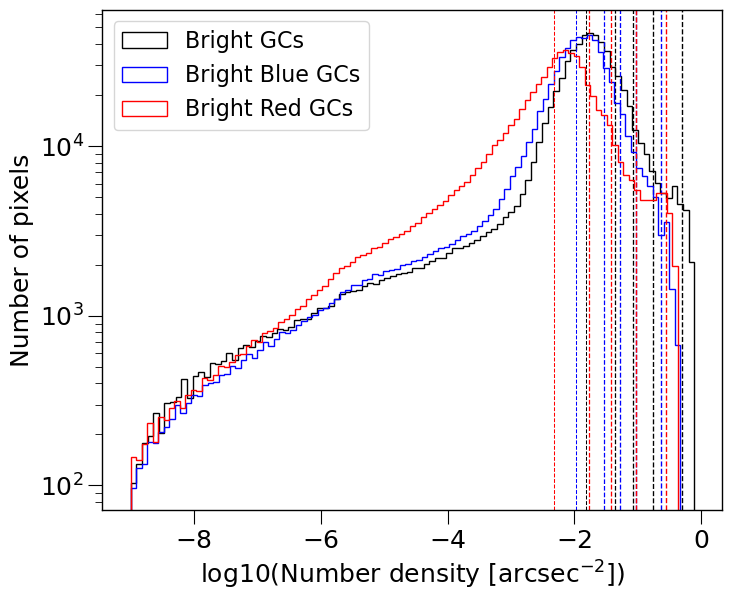

In [5]:
# briefly examine the levels chosen for the contours in the smoothed number density maps

fig, ax = plt.subplots(1, figsize=(8, 6.5))
for sample, color in zip([bright_gcs, blue_gcs, red_gcs], ["k", "b", "r"]):
    ax.hist(
        numpy.log10(
            sample.nrho_smooth_img[sample.nrho_smooth_img.value > 1e-9].value.flatten()
        ),
        bins=100,
        histtype="step",
        color=color,
        label=sample.name,
    )
    print(sample.name, sample.nrho_smooth_img.max())
    for pp in [50, 80, 90, 95, 99]:
        print(
            sample.name,
            pp,
            numpy.percentile(
                numpy.log10(
                    sample.nrho_smooth_img[
                        sample.nrho_smooth_img.value > 1e-9
                    ].value.flatten()
                ),
                pp,
            ),
        )
        ax.axvline(
            numpy.percentile(
                numpy.log10(
                    sample.nrho_smooth_img[
                        sample.nrho_smooth_img.value > 1e-9
                    ].value.flatten()
                ),
                pp,
            ),
            color=color,
            linestyle="--",
            lw=0.5 + 0.5 * (pp / 100),
        )
ax.set_yscale("log")
ax.set_ylabel("Number of pixels")
ax.set_xlabel("log10(Number density [arcsec$^{-2}$])")
# for ll in [0.0005, 0.002, 0.003, 0.006, 0.02]:
#  ax.axvline(numpy.log10(ll), color = "k", linestyle = "--", lw = 0.5)


ax.legend()
fig.show()

## Comparing the blue / red GC distributions

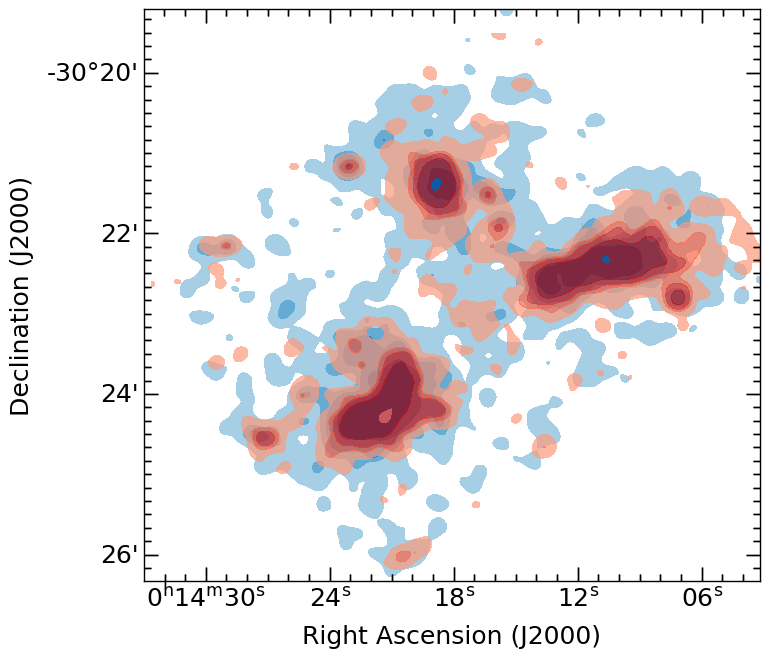

In [6]:
def figure_number_density_gcs_blue_red_contours(
    gcs1, gcs2, colors1, colors2, fname="", **kwargs
):
    fig, axs = plt.subplots(
        1,
        figsize=(8, 6.5),
        sharex=True,
        sharey=True,
        subplot_kw={"projection": gcs1.wcs},
    )
    axs = numpy.atleast_1d(axs)
    axs = axs.ravel()
    left = 0.1
    right = 0.87
    top = 0.98
    bottom = 0.1
    hspace = 0.0
    wspace = 0.1

    levels = [
        numpy.power(10, -1.9),
        numpy.power(10, -1.4),
        numpy.power(10, -1.2),
        numpy.power(10, -0.9),
        numpy.power(10, -0.4),
    ]
    for sample, colors, alpha in zip([gcs1, gcs2], [colors1, colors2], [1, 0.7]):
        contours = axs[0].contourf(
            sample.nrho_smooth_img.value,
            levels=levels,
            colors=colors,
            alpha=alpha,
            transform=axs[0].get_transform(sample.wcs),
        )

    # format all axes
    for j, ax in enumerate(axs):
        ra = ax.coords[0]
        dec = ax.coords[1]
        dec.set_axislabel("Declination (J2000)")
        ra.set_axislabel("Right Ascension (J2000)")

        # set the formatting of the axes
        ra.set_major_formatter("hh:mm:ss")
        dec.set_major_formatter("dd:mm")
        # display minor ticks
        ra.display_minor_ticks(True)
        dec.display_minor_ticks(True)
        ra.set_minor_frequency(6)
        dec.set_minor_frequency(12)
        ra.tick_params(
            which="major", direction="in", top=True, bottom=True, length=10, width=1
        )
        dec.tick_params(
            which="major", direction="in", right=True, left=True, length=10, width=1
        )
        ra.tick_params(which="minor", length=5)
        dec.tick_params(which="minor", length=5)

    # format the entire figure
    fig.subplots_adjust(
        left=left, top=top, bottom=bottom, right=right, hspace=hspace, wspace=wspace
    )

    # fname = "xy_allgcs_recovery_fraction.png"
    fig.savefig(os.path.join(out_path, fname + ".pdf"), bbox_inches="tight")
    plt.show()


figure_number_density_gcs_blue_red_contours(
    blue_gcs,
    red_gcs,
    plt.get_cmap("Blues")(numpy.linspace(0.35, 1, 5)),
    plt.get_cmap("Reds")(numpy.linspace(0.35, 1, 5)),
    fname="xy_compare_contours_f150w29p5_blue_red_gcs",
)

### Contours of all, blue and red GCs - only bright ones

[3.63749673 3.50942714] [-30.43909703 -30.32001405]
[array([-7.90123522e-12,  1.02462481e+03]), array([1.65982783e-11, 1.02399915e+03])]
[array([6.25493677e-03, 1.05524058e+03]), array([  -2.02386486, 1023.99223419])]
[array([ -12.15221509, 1024.64773082]), array([1.88763729e-02, 1.06940468e+03])]


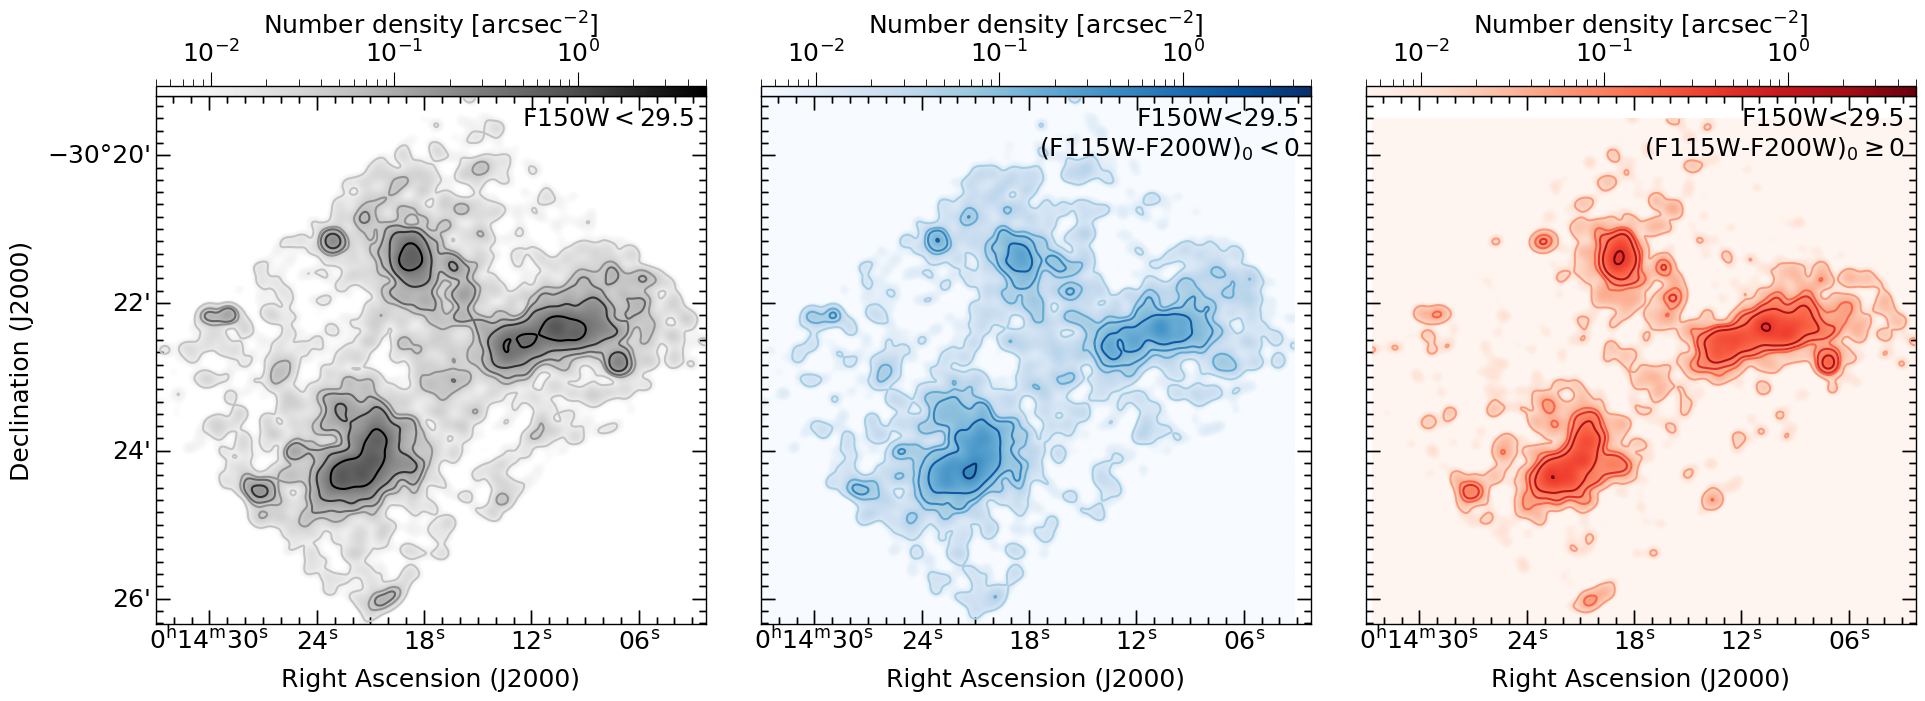

In [5]:
def figure_number_density_gcs_three_subsets_contours(
    gcs1, gcs2, gcs3, fname="", **kwargs
):
    def add_panel_with_contours_and_colorbar(ax, sample, cmap, colors, **kwargs):
        cb = ax.imshow(
            sample.nrho_smooth_img.value,
            aspect="auto",
            origin="lower",
            cmap=cmap,
            norm=LogNorm(vmin=5e-3, vmax=5),
        )
        levels = [
            numpy.power(10, -1.9),
            numpy.power(10, -1.4),
            numpy.power(10, -1.2),
            numpy.power(10, -0.9),
            numpy.power(10, -0.4),
        ]

        contours = ax.contour(
            sample.nrho_smooth_img.value,
            levels=levels,
            colors=colors,
            transform=ax.get_transform(sample.wcs),
        )
        ax.annotate(
            sample.label,
            xy=(0.98, 0.98),
            ha="right",
            va="top",
            xycoords="axes fraction",
        )
        # add the colorbar
        cax = ax.inset_axes([0.0, 1.0001, 1.0, 0.02])  # [x0, y0, width, height]
        # create the colorbar object
        cbar = fig.colorbar(
            cb, cax=cax, ax=axs[0], orientation="horizontal", location="top"
        )
        cbar.minorticks_on()  # add minorticks
        cbar.ax.xaxis.set_ticks_position("top")
        cbar.set_label(
            "Number density [arcsec$^{-2}$]",
        )  # add label

    fig = plt.figure(figsize=(20, 6))
    left = 0.1
    right = 0.98
    top = 0.98
    bottom = 0.1
    hspace = 0.0
    wspace = 0.1

    dict_cmaps = {"all_gcs": "Greys", "blue_gcs": "Blues", "red_gcs": "Reds"}
    dict_colors = {
        "all_gcs": plt.get_cmap("Greys")(numpy.linspace(0.35, 1, 5)),
        "blue_gcs": plt.get_cmap("Blues")(numpy.linspace(0.35, 1, 5)),
        "red_gcs": plt.get_cmap("Reds")(numpy.linspace(0.35, 1, 5)),
    }

    axs = []
    for i, sample, type in zip(
        range(10), [gcs1, gcs2, gcs3], ["all_gcs", "blue_gcs", "red_gcs"]
    ):
        ax = fig.add_subplot(1, 3, i + 1, projection=sample.wcs)
        axs.append(ax)
        add_panel_with_contours_and_colorbar(
            ax, sample, dict_cmaps[type], dict_colors[type], **kwargs
        )

    # format all axes
    # find the limits of the image for the bright GCs sample in (RA, DEC)
    gcs1_xlim_ra = numpy.asarray(
        gcs1.wcs.all_pix2world([0, gcs1.nrho_smooth_img.shape[0]], [0, 0], 0)
    )[0]
    gcs1_ylim_dec = numpy.asarray(
        gcs1.wcs.all_pix2world([0, 0], [0, gcs1.nrho_smooth_img.shape[1]], 0)
    )[1]
    print(gcs1_xlim_ra, gcs1_ylim_dec)

    for j, ax, sample in zip(range(10), axs, [bright_gcs, blue_gcs, red_gcs]):
        ra = ax.coords[0]
        dec = ax.coords[1]
        if j == 0:
            dec.set_axislabel("Declination (J2000)")
        else:
            dec.set_ticks_visible(True)
            dec.set_ticklabel_visible(False)
            dec.set_axislabel("")
        ra.set_axislabel("Right Ascension (J2000)")
        # set the formatting of the axes
        ra.set_major_formatter("hh:mm:ss")
        dec.set_major_formatter("dd:mm")
        # display minor ticks
        ra.display_minor_ticks(True)
        dec.display_minor_ticks(True)
        ra.set_minor_frequency(6)
        dec.set_minor_frequency(12)
        ra.tick_params(
            which="major", direction="in", top=True, bottom=True, length=10, width=1
        )
        dec.tick_params(
            which="major", direction="in", right=True, left=True, length=10, width=1
        )
        ra.tick_params(which="minor", length=5)
        dec.tick_params(which="minor", length=5)
        # for each sample, covert the edges in (RA,DEC) to pixels and apply those limits to the panel
        lim_pix = sample.wcs.all_world2pix(gcs1_xlim_ra, gcs1_ylim_dec, 0)
        print(lim_pix)
        ax.set_xlim(lim_pix[0])
        ax.set_ylim(lim_pix[1])

    # format the entire figure
    fig.subplots_adjust(
        left=left, top=top, bottom=bottom, right=right, hspace=hspace, wspace=wspace
    )
    fig.savefig(os.path.join(out_path, fname + ".pdf"), bbox_inches="tight")
    plt.show()


figure_number_density_gcs_three_subsets_contours(
    bright_gcs,
    blue_gcs,
    red_gcs,
    fname="xy_compare_contours_f150w29p5_all_blue_red_gcs",
)

In [ ]:
len(bright_gcs.ra)

6624

[3.63749673 3.50942714] [-30.43909703 -30.32001405]
[array([-7.90123522e-12,  1.02462481e+03]), array([1.65982783e-11, 1.02399915e+03])]
[array([-7.90123522e-12,  1.02462481e+03]), array([1.65982783e-11, 1.02399915e+03])]
[array([6.25493677e-03, 1.05524058e+03]), array([  -2.02386486, 1023.99223419])]
[array([ -12.15221509, 1024.64773082]), array([1.88763729e-02, 1.06940468e+03])]


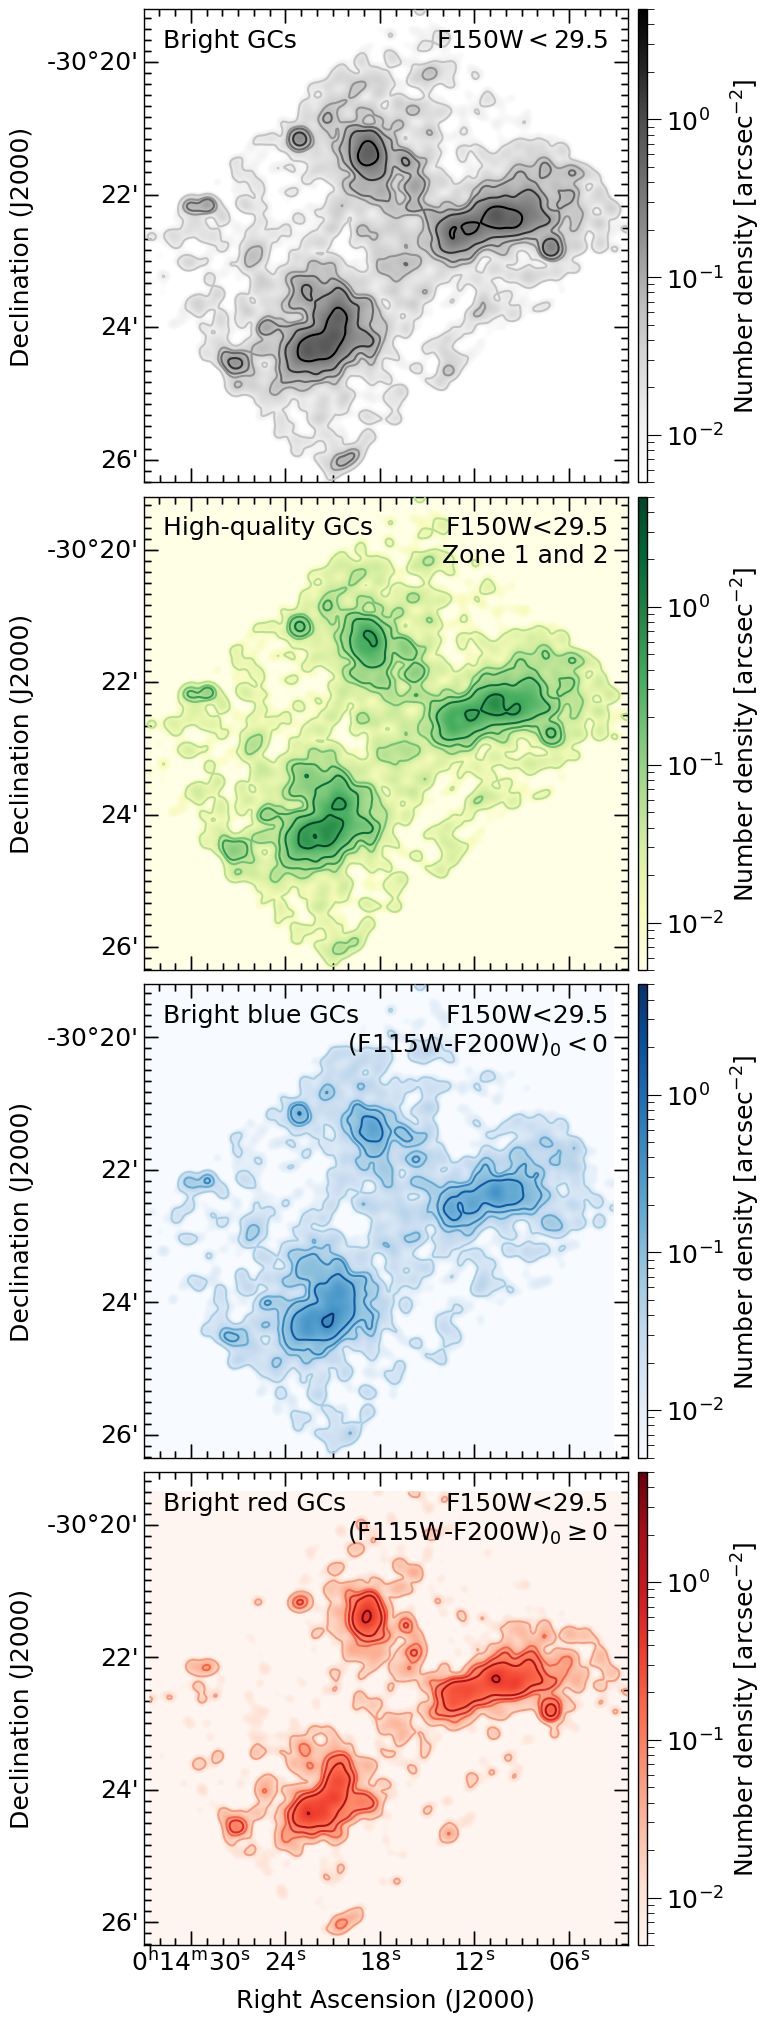

In [8]:
def figure_number_density_gcs_four_subsets_contours(
    gcs1, gcs2, gcs3, gcs4, fname="", **kwargs
):
    def add_panel_with_contours_and_colorbar(
        ax, sample, cmap, colors, annotation, **kwargs
    ):
        cb = ax.imshow(
            sample.nrho_smooth_img.value,
            aspect="auto",
            origin="lower",
            cmap=cmap,
            norm=LogNorm(vmin=5e-3, vmax=5),
        )
        levels = [
            numpy.power(10, -1.9),
            numpy.power(10, -1.4),
            numpy.power(10, -1.2),
            numpy.power(10, -0.9),
            numpy.power(10, -0.4),
        ]

        contours = ax.contour(
            sample.nrho_smooth_img.value,
            levels=levels,
            colors=colors,
            transform=ax.get_transform(sample.wcs),
        )
        ax.annotate(
            sample.label,
            xy=(0.96, 0.96),
            ha="right",
            va="top",
            xycoords="axes fraction",
        )
        ax.annotate(
            annotation, xy=(0.04, 0.96), ha="left", va="top", xycoords="axes fraction"
        )

        # add the colorbar
        # cax = ax.inset_axes([0., 1.0001, 1.0, 0.02]) # [x0, y0, width, height]
        cax = ax.inset_axes([1.02, 0.0, 0.02, 1.0])  # [x0, y0, width, height]
        # create the colorbar object
        cbar = fig.colorbar(
            cb, cax=cax, ax=axs[0], orientation="vertical", location="right"
        )
        cbar.minorticks_on()  # add minorticks
        # cbar.ax.xaxis.set_ticks_position('top')
        cbar.set_label(
            "Number density [arcsec$^{-2}$]",
        )  # add label

    fig = plt.figure(figsize=(5.5, 22))
    left = 0.1
    right = 0.98
    top = 0.98
    bottom = 0.1
    hspace = 0.03
    wspace = 0.1

    dict_cmaps = {
        "high_quality_gcs": "YlGn",
        "all_gcs": "Greys",
        "blue_gcs": "Blues",
        "red_gcs": "Reds",
    }
    dict_colors = {
        "high_quality_gcs": plt.get_cmap("YlGn")(numpy.linspace(0.35, 1, 5)),
        "all_gcs": plt.get_cmap("Greys")(numpy.linspace(0.35, 1, 5)),
        "blue_gcs": plt.get_cmap("Blues")(numpy.linspace(0.35, 1, 5)),
        "red_gcs": plt.get_cmap("Reds")(numpy.linspace(0.35, 1, 5)),
    }
    dict_annotations = {
        "high_quality_gcs": "High-quality GCs",
        "all_gcs": "Bright GCs",
        "blue_gcs": "Bright blue GCs",
        "red_gcs": "Bright red GCs",
    }

    axs = []
    for i, sample, type in zip(
        range(10),
        [gcs1, gcs2, gcs3, gcs4],
        ["all_gcs", "high_quality_gcs", "blue_gcs", "red_gcs"],
    ):
        ax = fig.add_subplot(4, 1, i + 1, projection=sample.wcs)
        axs.append(ax)
        add_panel_with_contours_and_colorbar(
            ax,
            sample,
            dict_cmaps[type],
            dict_colors[type],
            dict_annotations[type],
            **kwargs
        )

    # format all axes
    # find the limits of the image for the bright GCs sample in (RA, DEC)
    gcs1_xlim_ra = numpy.asarray(
        gcs1.wcs.all_pix2world([0, gcs1.nrho_smooth_img.shape[0]], [0, 0], 0)
    )[0]
    gcs1_ylim_dec = numpy.asarray(
        gcs1.wcs.all_pix2world([0, 0], [0, gcs1.nrho_smooth_img.shape[1]], 0)
    )[1]
    print(gcs1_xlim_ra, gcs1_ylim_dec)

    for j, ax, sample in zip(
        range(10), axs, [bright_gcs, high_quality_gcs, blue_gcs, red_gcs]
    ):
        ra = ax.coords[0]
        dec = ax.coords[1]

        dec.set_axislabel("Declination (J2000)")
        if j == 3:
            ra.set_axislabel("Right Ascension (J2000)")
        else:
            ra.set_ticks_visible(True)
            ra.set_ticklabel_visible(False)
            ra.set_axislabel("")

        # set the formatting of the axes
        ra.set_major_formatter("hh:mm:ss")
        dec.set_major_formatter("dd:mm")
        # display minor ticks
        ra.display_minor_ticks(True)
        dec.display_minor_ticks(True)
        ra.set_minor_frequency(6)
        dec.set_minor_frequency(12)
        ra.tick_params(
            which="major", direction="in", top=True, bottom=True, length=10, width=1
        )
        dec.tick_params(
            which="major", direction="in", right=True, left=True, length=10, width=1
        )
        ra.tick_params(which="minor", length=5)
        dec.tick_params(which="minor", length=5)
        # for each sample, covert the edges in (RA,DEC) to pixels and apply those limits to the panel
        lim_pix = sample.wcs.all_world2pix(gcs1_xlim_ra, gcs1_ylim_dec, 0)
        print(lim_pix)
        ax.set_xlim(lim_pix[0])
        ax.set_ylim(lim_pix[1])

    # format the entire figure
    fig.subplots_adjust(
        left=left, top=top, bottom=bottom, right=right, hspace=hspace, wspace=wspace
    )
    fig.savefig(os.path.join(out_path, fname + ".pdf"), bbox_inches="tight")
    plt.show()


figure_number_density_gcs_four_subsets_contours(
    bright_gcs,
    high_quality_gcs,
    blue_gcs,
    red_gcs,
    fname="xy_compare_contours_f150w29p5_high_all_blue_red_gcs",
)

## LambdaMaps

### Combined: lensing models, stellar light and X-ray data

0 5
1 6
0 7
[3.64877441 3.50182284] [-30.44112939 -30.3144351 ]
[array([  75.58398458, 5901.50542646]), array([  30.94118009, 5851.9596761 ])]
[array([5.59339242e-11, 4.56395589e+03]), array([-3.95630195e-11,  4.56100003e+03])]
[array([-48.94434023, 406.28326458]), array([  2.59446522, 457.58124432])]
[array([-48.94434023, 406.28326458]), array([  2.59446522, 457.58124432])]
[array([2.50323794e-01, 5.70581241e+03]), array([5.34708724e-01, 5.70116862e+03])]
[array([2.50323794e-01, 5.70581241e+03]), array([5.34708724e-01, 5.70116862e+03])]
[array([  82.16518456, 1009.14731272]), array([ 147.1081569 , 1074.79423279])]


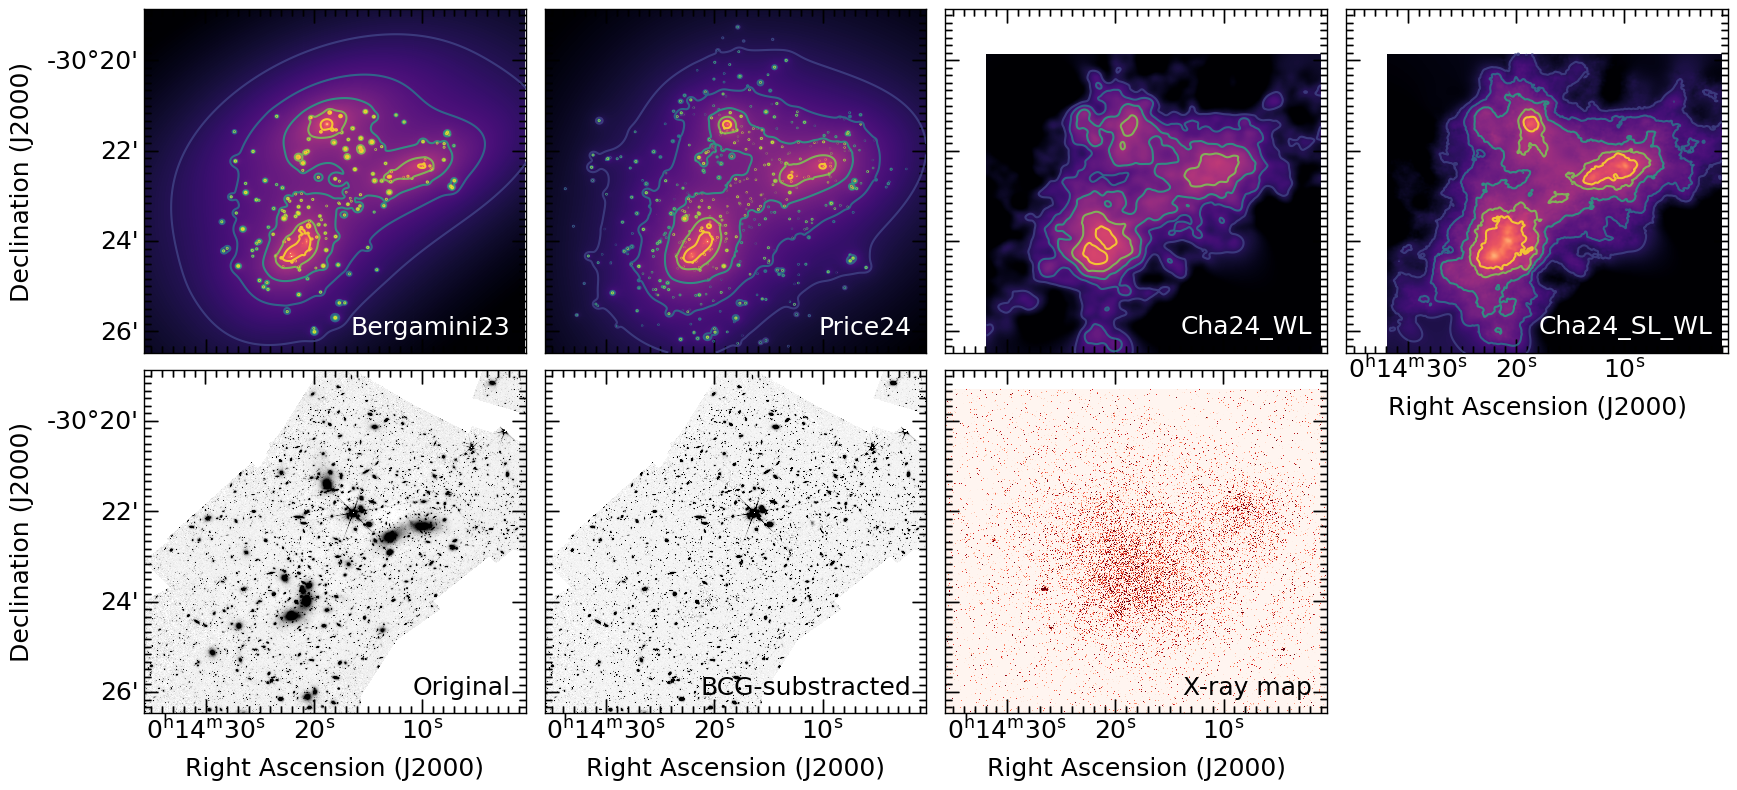

In [9]:
def add_lensing_map(ax, lmap, cmap, label="", lim_cbar=[0, 1]):
    cb = ax.imshow(
        lmap.img_mass.value.T,
        origin="lower",
        transform=ax.get_transform(lmap.wcs),
        aspect="auto",
        cmap=cmap,
        norm=LogNorm(vmin=lim_cbar[0], vmax=lim_cbar[1]),
        zorder=0,
    )
    levels = [
        numpy.power(10, 8.3),
        numpy.power(10, 8.5),
        numpy.power(10, 8.7),
        numpy.power(10, 8.9),
        numpy.power(10, 9.1),
    ]
    colors = plt.get_cmap("viridis")(numpy.linspace(0.2, 1, 5))
    ax.contour(
        lmap.img_mass.value.T,
        levels=levels,
        colors=colors,
        alpha=0.8,
        transform=ax.get_transform(lmap.wcs),
    )
    ax.annotate(
        label,
        xy=(0.96, 0.04),
        ha="right",
        va="bottom",
        xycoords="axes fraction",
        color="white",
    )
    return cb


def add_stellar_light_with_colorbar(ax, lmap, cmap, label="", lim_cbar=[0, 1]):
    img = lmap.img.value.T  # /numpy.median(lmap.img[lmap.img>0])
    min_img = numpy.percentile(img[img > 0], 1)
    max_img = numpy.percentile(img[img > 0], 97)
    cb = ax.imshow(
        img,
        origin="lower",
        transform=ax.get_transform(lmap.wcs),
        aspect="auto",
        cmap=cmap,
        norm=LogNorm(vmin=min_img, vmax=max_img),
        zorder=0,
    )
    ax.annotate(
        label, xy=(0.96, 0.04), ha="right", va="bottom", xycoords="axes fraction"
    )
    # add the colorbar
    # cax = ax.inset_axes([0.0, 1.02, 1.0, 0.04]) # [x0, y0, width, height]
    # cax = ax.inset_axes([1.02, 0., 0.04, 1.0]) # [x0, y0, width, height]
    # create the colorbar object
    # cbar = fig.colorbar(cb, cax=cax, ax = ax)#, orientation = "horizontal", location = "top")
    # cbar.ax.xaxis.set_ticks_position('top')
    # cbar.minorticks_on() # add minorticks
    # cbar.set_label(r"$F_{\nu}/F_{\nu,\rm median}$") # add label
    return cb


def add_xray_with_colorbar(ax, lmap, cmap, label="", lim_cbar=[0, 1]):
    cb = ax.imshow(
        lmap.img.T,
        origin="lower",
        transform=ax.get_transform(lmap.wcs),
        aspect="auto",
        cmap=cmap,
        norm=Normalize(vmin=lim_cbar[0], vmax=lim_cbar[1]),
        zorder=0,
    )
    ax.annotate(
        label, xy=(0.96, 0.04), ha="right", va="bottom", xycoords="axes fraction"
    )
    # add the colorbar
    # cax = ax.inset_axes([0.0, 1.02, 1.0, 0.04]) # [x0, y0, width, height]
    # cax = ax.inset_axes([1.02, 0., 0.04, 1.0]) # [x0, y0, width, height]
    # create the colorbar object
    # cbar = fig.colorbar(cb, cax=cax, ax = ax)#, orientation = "horizontal", location = "top")
    # cbar.ax.xaxis.set_ticks_position('top')
    # cbar.minorticks_on() # add minorticks
    # cbar.set_label(r"Counts per pixel") # add label
    return cb


fig = plt.figure(figsize=(18, 8))
left = 0.1
right = 0.98
top = 0.98
bottom = 0.1
hspace = 0.05
wspace = 0.05

### LENSING MODELS

# determine limits for the colorbar
lim_cbar = [1e8, 1e10]

axs = []
for i, lmap in enumerate([b23_lambda, p24_lambda, cha24_wl_lambda, cha24_lambda]):
    ax = fig.add_subplot(2, 4, i + 1, projection=lmap.wcs)
    axs.append(ax)
    cb = add_lensing_map(ax, lmap, "magma", label=lmap.name, lim_cbar=lim_cbar)

# add the colorbar
# cax = ax.inset_axes([1.05, 0., 0.04, 1.0]) # [x0, y0, width, height]
# create the colorbar object
# cbar = fig.colorbar(cb, cax=cax, ax = axs[-1])
# cbar.minorticks_on() # add minorticks
# cbar.set_label(r"$\Sigma~[\rm M_{\odot}/kpc^2]$") # add label

### STELLAR LIGHT MAPS
# determine limits for the colorbar
lim_cbar = [1e-3, 1]

for i, lmap in enumerate([mosaic_avg, bcgless_avg]):
    print(i, i + 5)
    ax = fig.add_subplot(2, 4, i + 5, projection=lmap.wcs)
    axs.append(ax)
    cb = add_stellar_light_with_colorbar(
        ax, lmap, "Greys", label=lmap.name, lim_cbar=lim_cbar
    )

### X-RAY MAP
lim_cbar = [0, 1]
for i, lmap in enumerate([map_xray]):
    print(i, i + 7)
    ax = fig.add_subplot(2, 4, i + 7, projection=lmap.wcs)
    axs.append(ax)
    cb = add_xray_with_colorbar(ax, lmap, "Reds", label=lmap.name, lim_cbar=lim_cbar)

# find the limits of the image for the bright GCs sample in (RA, DEC)
p24_xlim_ra = numpy.asarray(
    p24_lambda.wcs.all_pix2world([0, p24_lambda.img.shape[0]], [0, 0], 0)
)[0]
p24_ylim_dec = numpy.asarray(
    p24_lambda.wcs.all_pix2world([0, 0], [0, p24_lambda.img.shape[1]], 0)
)[1]
print(p24_xlim_ra, p24_ylim_dec)

# format all axes
for j, ax, sample in zip(
    range(10),
    axs,
    [
        b23_lambda,
        p24_lambda,
        cha24_wl_lambda,
        cha24_lambda,
        mosaic_avg,
        bcgless_avg,
        map_xray,
    ],
):
    ax.set_xlabel("")
    ra = ax.coords[0]
    dec = ax.coords[1]
    if j % 4 == 0:
        dec.set_axislabel("Declination (J2000)")
    else:
        dec.set_ticks_visible(True)
        dec.set_ticklabel_visible(False)
        dec.set_axislabel("")
    if j > 2:
        ra.set_axislabel("Right Ascension (J2000)")
    else:
        ra.set_ticklabel_visible(False)
        ra.set_axislabel("")
    # set the formatting of the axes
    ra.set_major_formatter("hh:mm:ss")
    dec.set_major_formatter("dd:mm")
    # display minor ticks
    ra.display_minor_ticks(True)
    dec.display_minor_ticks(True)
    ra.set_minor_frequency(10)
    dec.set_minor_frequency(12)
    ra.tick_params(
        which="major", direction="in", top=True, bottom=True, length=10, width=1
    )
    dec.tick_params(
        which="major", direction="in", right=True, left=True, length=10, width=1
    )
    ra.tick_params(which="minor", length=5)
    dec.tick_params(which="minor", length=5)
    # for each sample, covert the edges in (RA,DEC) to pixels and apply those limits to the panel
    lim_pix = sample.wcs.all_world2pix(p24_xlim_ra, p24_ylim_dec, 0)
    print(lim_pix)
    ax.set_xlim(lim_pix[0])
    ax.set_ylim(lim_pix[1])

# format the entire figure
fig.subplots_adjust(
    left=left, top=top, bottom=bottom, right=right, hspace=hspace, wspace=wspace
)

fig.savefig(
    os.path.join(out_path, "xy_all_observational_maps.pdf"), bbox_inches="tight"
)
plt.show()

## LambdaMaps with GC contours

[3.64877441 3.50182284] [-30.44112939 -30.3144351 ]
[array([5.59339242e-11, 4.56395589e+03]), array([-3.95630195e-11,  4.56100003e+03])]
[array([2.50323794e-01, 5.70581241e+03]), array([5.34708724e-01, 5.70116862e+03])]
[array([  82.16518456, 1009.14731272]), array([ 147.1081569 , 1074.79423279])]


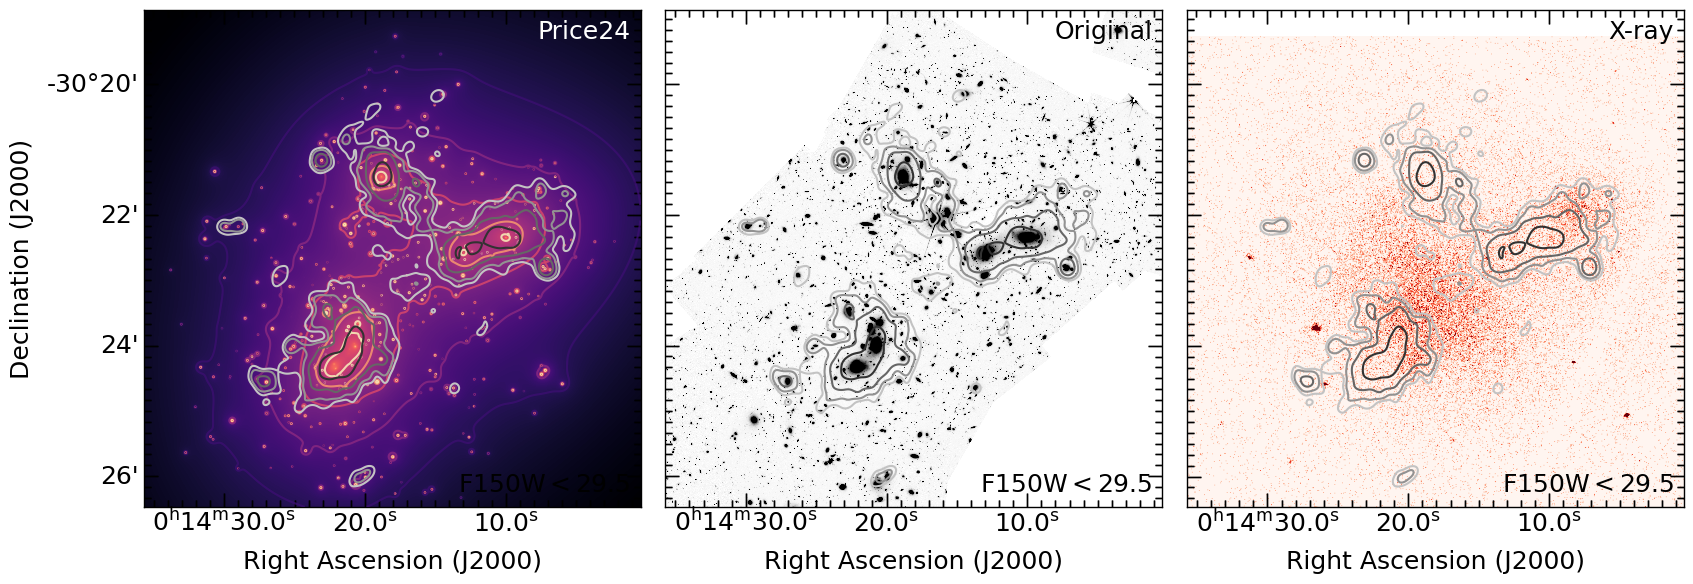

In [10]:
def figure_lensing_map_stellar_light_xray_with_gcs_contours(
    map_lensing, map_light, map_xray, gcs1, **kwargs
):
    def add_panel_lensing_map(ax, img, cmap, label="", lim_cbar=[0, 1]):
        cb = ax.imshow(
            img.T,
            origin="lower",
            cmap=cmap,
            norm=LogNorm(vmin=lim_cbar[0], vmax=lim_cbar[1]),
            zorder=0,
        )
        levels = [
            numpy.power(10, 8.3),
            numpy.power(10, 8.5),
            numpy.power(10, 8.7),
            numpy.power(10, 8.9),
            numpy.power(10, 9.1),
        ]
        colors = plt.get_cmap("magma")(numpy.linspace(0.2, 1, 5))
        ax.contour(img.T, levels=levels, colors=colors, alpha=0.8)
        ax.annotate(
            label,
            xy=(0.98, 0.98),
            ha="right",
            va="top",
            xycoords="axes fraction",
            color="white",
        )
        return cb

    def add_panel_stellar_light_map(ax, lmap, cmap, label="", lim_cbar=[0, 1]):
        img = lmap.img.T / numpy.median(lmap.img[lmap.img > 0])
        min_img = numpy.percentile(img[img > 0], 1)
        max_img = numpy.percentile(img[img > 0], 97)
        cb = ax.imshow(
            img,
            origin="lower",
            transform=ax.get_transform(lmap.wcs),
            cmap=cmap,
            norm=Normalize(vmin=min_img, vmax=max_img),
            zorder=0,
        )
        ax.annotate(
            label,
            xy=(0.98, 0.98),
            ha="right",
            va="top",
            xycoords="axes fraction",
            color="black",
        )
        return cb

    def add_panel_xray_map(ax, img, cmap, label="", lim_cbar=[0, 1]):
        cb = ax.imshow(
            img.T,
            origin="lower",
            cmap=cmap,
            norm=Normalize(vmin=lim_cbar[0], vmax=lim_cbar[1]),
            zorder=0,
        )
        ax.annotate(
            label,
            xy=(0.98, 0.98),
            ha="right",
            va="top",
            xycoords="axes fraction",
            color="black",
        )
        return cb

    def add_gcs_to_panel(ax, sample, cmap, colors, label="", **kwargs):
        levels = [
            numpy.power(10, -1.4),
            numpy.power(10, -1.2),
            numpy.power(10, -0.9),
            numpy.power(10, -0.4),
        ]
        contours = ax.contour(
            sample.nrho_smooth_img.value,
            levels=levels,
            colors=colors,
            transform=ax.get_transform(sample.wcs),
        )
        ax.annotate(
            sample.label,
            xy=(0.98, 0.02),
            ha="right",
            va="bottom",
            xycoords="axes fraction",
            color="black",
        )

    fig = plt.figure(figsize=(20, 6.5))

    left = 0.1
    right = 0.87
    top = 0.98
    bottom = 0.1
    hspace = 0.0
    wspace = 0.05

    axs = []

    # lensing map
    ax = fig.add_subplot(131, projection=map_lensing.wcs)
    cb = add_panel_lensing_map(
        ax, map_lensing.img_mass.value, "magma", label="Price24", lim_cbar=[1e8, 1e10]
    )
    axs.append(ax)

    # stellar light map
    ax = fig.add_subplot(132, projection=map_light.wcs)
    cb = add_panel_stellar_light_map(
        ax, map_light, "Greys", label="Original", lim_cbar=[0, 1]
    )
    axs.append(ax)

    # x-ray map
    ax = fig.add_subplot(133, projection=map_xray.wcs)
    cb = add_panel_xray_map(ax, map_xray.img, "Reds", label="X-ray", lim_cbar=[0, 1])
    axs.append(ax)

    # add the contours of the bright GCs sample
    for ax in axs:
        add_gcs_to_panel(
            ax,
            gcs1,
            "Greys",
            plt.get_cmap("Greys")(numpy.linspace(0.35, 1, 5)),
            **kwargs
        )

    # find the limits of the image for the bright GCs sample in (RA, DEC)
    p24_xlim_ra = numpy.asarray(
        map_lensing.wcs.all_pix2world([0, map_lensing.img.shape[0]], [0, 0], 0)
    )[0]
    p24_ylim_dec = numpy.asarray(
        map_lensing.wcs.all_pix2world([0, 0], [0, map_lensing.img.shape[1]], 0)
    )[1]
    print(p24_xlim_ra, p24_ylim_dec)
    # format all axes
    for j, ax, sample in zip(range(10), axs, [map_lensing, map_light, map_xray]):
        ra = ax.coords[0]
        dec = ax.coords[1]
        if j % 3 == 0:
            dec.set_axislabel("Declination (J2000)")
        else:
            dec.set_ticks_visible(True)
            dec.set_ticklabel_visible(False)
            dec.set_axislabel("")

        ra.set_axislabel("Right Ascension (J2000)")

        # set the formatting of the axes
        ra.set_major_formatter("hh:mm:ss.s")
        dec.set_major_formatter("dd:mm")
        # display minor ticks
        ra.display_minor_ticks(True)
        dec.display_minor_ticks(True)
        ra.set_minor_frequency(10)
        dec.set_minor_frequency(12)
        ra.tick_params(
            which="major", direction="in", top=True, bottom=True, length=10, width=1
        )
        dec.tick_params(
            which="major", direction="in", right=True, left=True, length=10, width=1
        )
        ra.tick_params(which="minor", length=5)
        dec.tick_params(which="minor", length=5)

        # for each sample, covert the edges in (RA,DEC) to pixels and apply those limits to the panel
        lim_pix = sample.wcs.all_world2pix(p24_xlim_ra, p24_ylim_dec, 0)
        print(lim_pix)
        ax.set_xlim(lim_pix[0])
        ax.set_ylim(lim_pix[1])

    # format the entire figure
    fig.subplots_adjust(
        left=left, top=top, bottom=bottom, right=right, hspace=hspace, wspace=wspace
    )
    fig.savefig(
        os.path.join(out_path, "xy_price24_original_xray_with_gcs_all.pdf"),
        bbox_inches="tight",
    )
    plt.show()


figure_lensing_map_stellar_light_xray_with_gcs_contours(
    p24_lambda, mosaic_avg, map_xray, bright_gcs
)